# Assignment. 자동차 평가 데이터에 대한 EDA 및 Decision Tree를 활용한 예측

In [47]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

## [Mission 1] 모든 속성들을 수치형 데이터로 변환

In [48]:
df['buying']=df['buying'].map({'vhigh':1,'high':2,'med':3,'low':4})
df['maint']=df['maint'].map({'vhigh':1,'high':2,'med':3,'low':4})
df['doors']=df['doors'].map({'1':1,'2':2,'3':3,'4':4,'5more':5})
df['persons']=df['persons'].map({'1':1,'2':2,'3':3,'4':4,'more':5})
df['log_boot']=df['log_boot'].map({'small':1,'med':2,'big':3})
df['safety']=df['safety'].map({'high':1,'med':2,'low':3})
df['eval']=df['eval'].map({'unacc':1,'acc':2,'good':3,'vgood':4})
df

,buying,maint,doors,persons,log_boot,safety,eval
0,1,1,2,2,1,3,1
1,1,1,2,2,1,2,1
2,1,1,2,2,1,1,1
3,1,1,2,2,2,3,1
4,1,1,2,2,2,2,1
5,1,1,2,2,2,1,1
6,1,1,2,2,3,3,1
7,1,1,2,2,3,2,1
8,1,1,2,2,3,1,1
9,1,1,2,4,1,3,1


In [49]:
df.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,3.500000,3.666667,2.000000,2.000000,1.414931
std,1.118358,1.118358,1.118358,1.247580,0.816733,0.816733,0.740700
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,2.750000,2.000000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,3.500000,4.000000,2.000000,2.000000,1.000000
75%,3.250000,3.250000,4.250000,5.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,4.000000


## [Mission 2] Target 4개별로 그룹핑하여 각 속성별 기본 통계치 및 Box Plot 산출

In [50]:
dfGroup=df.groupby('eval')

In [51]:
dfGroup.size()

eval
1    1210
2     384
3      69
4      65
dtype: int64

In [52]:
dfGroup.describe()

buying        doors     log_boot        maint      persons  \
eval                                                                          
1    count  1210.000000  1210.000000  1210.000000  1210.000000  1210.000000   
     mean      2.350413     3.454545     1.932231     2.366942     3.314050   
     std       1.118099     1.127152     0.819754     1.127547     1.304272   
     min       1.000000     2.000000     1.000000     1.000000     2.000000   
     25%       1.000000     2.000000     1.000000     1.000000     2.000000   
     50%       2.000000     3.000000     2.000000     2.000000     4.000000   
     75%       3.000000     4.000000     3.000000     3.000000     5.000000   
     max       4.000000     5.000000     3.000000     4.000000     5.000000   
2    count   384.000000   384.000000   384.000000   384.000000   384.000000   
     mean      2.575521     3.585938     2.101562     2.591146     4.484375   
     std       1.041953     1.094925     0.799868     1.048199     0.500408   
     min       1.000000     2.000000     1.000000     1.000000     4.000000   
     25%       2.000000     3.000000     1.000000     2.000000     4.000000   
     50%       3.000000     4.000000     2.000000     3.000000     4.000000   
     75%       3.000000     5.000000     3.000000     3.000000     5.000000   
     max       4.000000     5.000000     3.000000     4.000000     5.000000   
3    count    69.000000    69.000000    69.000000    69.000000    69.000000   
     mean      3.666667     3.565217     2.043478     3.666667     4.478261   
     std       0.474858     1.104513     0.812309     0.474858     0.503187   
     min       3.000000     2.000000     1.000000     3.000000     4.000000   
     25%       3.000000     3.000000     1.000000     3.000000     4.000000   
     50%       4.000000     4.000000     2.000000     4.000000     4.000000   
     75%       4.000000     5.000000     3.000000     4.000000     5.000000   
     max       4.000000     5.000000     3.000000     4.000000     5.000000   
4    count    65.000000    65.000000    65.000000    65.000000    65.000000   
     mean      3.600000     3.769231     2.615385     3.200000     4.538462   
     std       0.493710     1.057255     0.490290     0.754155     0.502398   
     min       3.000000     2.000000     2.000000     2.000000     4.000000   
     25%       3.000000     3.000000     2.000000     3.000000     4.000000   
     50%       4.000000     4.000000     3.000000     3.000000     5.000000   
     75%       4.000000     5.000000     3.000000     4.000000     5.000000   
     max       4.000000     5.000000     3.000000     4.000000     5.000000   

                 safety  
eval                     
1    count  1210.000000  
     mean      2.247107  
     std       0.802763  
     min       1.000000  
     25%       2.000000  
     50%       2.000000  
     75%       3.000000  
     max       3.000000  
2    count   384.000000  
     mean      1.468750  
     std       0.499674  
     min       1.000000  
     25%       1.000000  
     50%       1.000000  
     75%       2.000000  
     max       2.000000  
3    count    69.000000  
     mean      1.565217  
     std       0.499360  
     min       1.000000  
     25%       1.000000  
     50%       2.000000  
     75%       2.000000  
     max       2.000000  
4    count    65.000000  
     mean      1.000000  
     std       0.000000  
     min       1.000000  
     25%       1.000000  
     50%       1.000000  
     75%       1.000000  
     max       1.000000

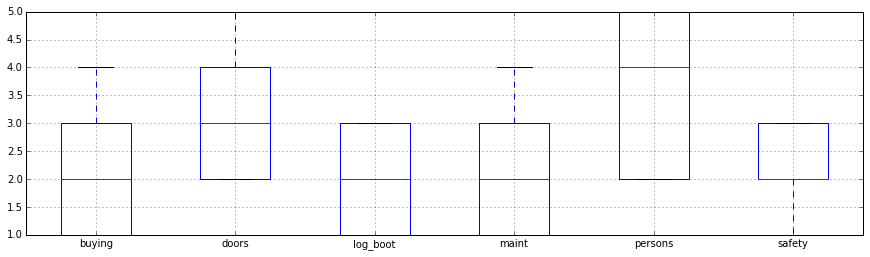

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
dfGroup.get_group(1).boxplot(ax=ax)
plt.show()

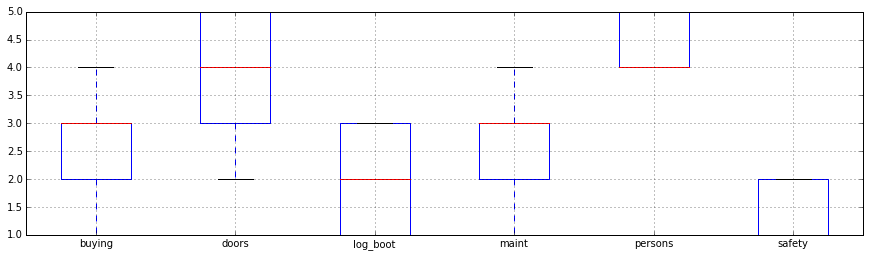

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
dfGroup.get_group(2).boxplot(ax=ax)
plt.show()

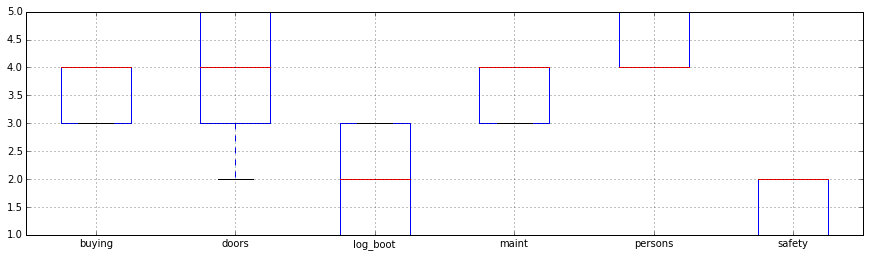

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
dfGroup.get_group(3).boxplot(ax=ax)
plt.show()

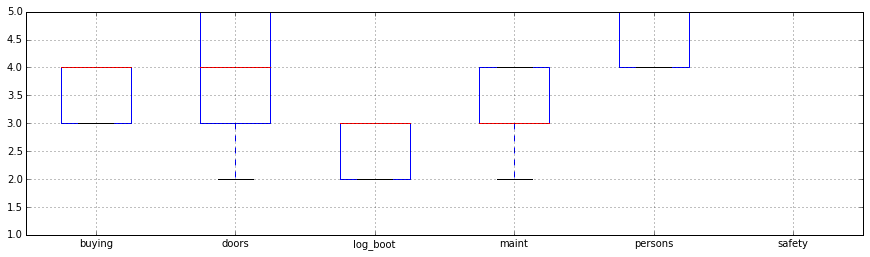

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
dfGroup.get_group(4).boxplot(ax=ax)
plt.show()

## [Mission 3] 각 속성들을 두 개씩 쌍을 지어서 각 쌍마다 Scatter Plot 그리기

In [57]:
df_groups=df.groupby('eval')

In [58]:
df_groups.count()

,buying,maint,doors,persons,log_boot,safety
eval,,,,,,
1,1210,1210,1210,1210,1210,1210
2,384,384,384,384,384,384
3,69,69,69,69,69,69
4,65,65,65,65,65,65


In [59]:
df_groups.count()

,buying,maint,doors,persons,log_boot,safety
eval,,,,,,
1,1210,1210,1210,1210,1210,1210
2,384,384,384,384,384,384
3,69,69,69,69,69,69
4,65,65,65,65,65,65


In [60]:
eval_1_df=df[df['eval']== 1]
eval_2_df=df[df['eval']== 2]
eval_3_df=df[df['eval']== 3]
eval_4_df=df[df['eval']== 3]

In [61]:
feature_names=['buying','maint','doors','persons','log_boot','safety']

In [62]:
eval_1_df

,buying,maint,doors,persons,log_boot,safety,eval
0,1,1,2,2,1,3,1
1,1,1,2,2,1,2,1
2,1,1,2,2,1,1,1
3,1,1,2,2,2,3,1
4,1,1,2,2,2,2,1
5,1,1,2,2,2,1,1
6,1,1,2,2,3,3,1
7,1,1,2,2,3,2,1
8,1,1,2,2,3,1,1
9,1,1,2,4,1,3,1


In [63]:
options = {
    0: {
        'data_x': feature_names[0],
        'data_y': feature_names[1],
        'label_x': feature_names[0] ,
        'label_y': feature_names[1],
    },
    1: {
        'data_x': feature_names[0],
        'data_y': feature_names[2],
        'label_x': feature_names[0],
        'label_y': feature_names[2] ,
    },
    2: {
        'data_x': feature_names[0],
        'data_y': feature_names[3],
        'label_x': feature_names[0] ,
        'label_y': feature_names[3] ,
    },
    3: {
        'data_x': feature_names[0],
        'data_y': feature_names[4],
        'label_x': feature_names[0] ,
        'label_y': feature_names[4] ,

    },
    4: {
        'data_x': feature_names[0],
        'data_y': feature_names[5],
        'label_x': feature_names[0] ,
        'label_y': feature_names[5] ,
    },
    5: {
        'data_x': feature_names[1],
        'data_y': feature_names[2],
        'label_x': feature_names[1] ,
        'label_y': feature_names[2] ,
    },
    6: {
        'data_x': feature_names[1],
        'data_y': feature_names[3],
        'label_x': feature_names[1] ,
        'label_y': feature_names[3] ,
    },
    7: {
        'data_x': feature_names[1],
        'data_y': feature_names[4],
        'label_x': feature_names[1] ,
        'label_y': feature_names[4] ,
    },
    8: {
        'data_x': feature_names[1],
        'data_y': feature_names[5],
        'label_x': feature_names[1] ,
        'label_y': feature_names[5] ,
    },
    9: {
        'data_x': feature_names[2],
        'data_y': feature_names[3],
        'label_x': feature_names[2] ,
        'label_y': feature_names[3] ,
    },
    10: {
        'data_x': feature_names[2],
        'data_y': feature_names[4],
        'label_x': feature_names[2] ,
        'label_y': feature_names[4] ,
    },
    11: {
        'data_x': feature_names[2],
        'data_y': feature_names[5],
        'label_x': feature_names[2] ,
        'label_y': feature_names[5] ,
    },
    12: {
        'data_x': feature_names[3],
        'data_y': feature_names[4],
        'label_x': feature_names[3] ,
        'label_y': feature_names[4] ,
    },
    13: {
        'data_x': feature_names[3],
        'data_y': feature_names[5],
        'label_x': feature_names[3] ,
        'label_y': feature_names[5] ,
    },
    14: {
        'data_x': feature_names[4],
        'data_y': feature_names[5],
        'label_x': feature_names[4] ,
        'label_y': feature_names[5] ,
    },
}

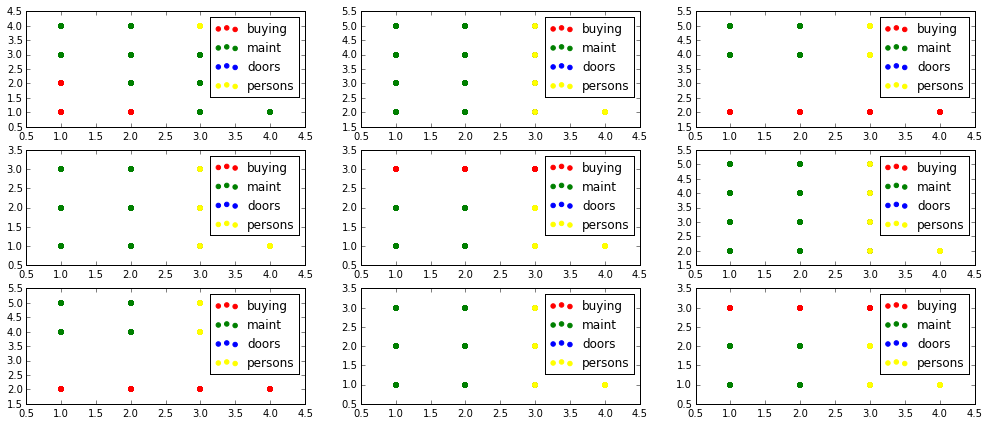

In [64]:
ax = []
fig = plt.figure(figsize=(17, 12))
for i in range(0,9):
    ax.append(fig.add_subplot(530 + (i+1)))

for i in range(0,9):
  s1=ax[i].scatter(eval_1_df[options[i]['data_x']], eval_1_df[options[i]['data_y']], color='red')
  s2=ax[i].scatter(eval_2_df[options[i]['data_x']], eval_2_df[options[i]['data_y']], color='green')
  s3=ax[i].scatter(eval_3_df[options[i]['data_x']], eval_3_df[options[i]['data_y']], color='blue')
  s4=ax[i].scatter(eval_4_df[options[i]['data_x']], eval_4_df[options[i]['data_y']], color='yellow')
  ax[i].legend((s1, s2, s3,s4), feature_names)

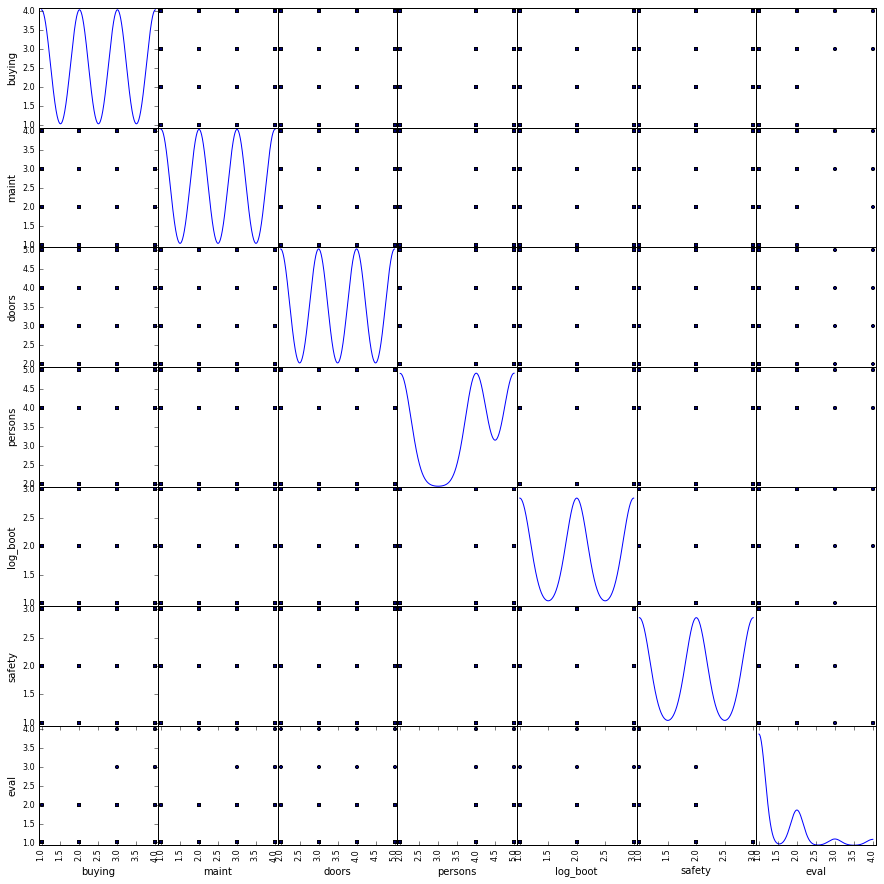

In [65]:
from pandas.tools.plotting import scatter_matrix

_ = scatter_matrix(df, figsize=(15, 15), diagonal='kde')

## [Mission 4] 전체 데이터 집합에 대한 Entropy 산출

In [66]:
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

In [67]:
df_per_attr = {}
for i in range(0, 6):
    df_per_attr[i] = {}
    groupby_df = df[[6, i]].groupby(feature_names[i])
    df_per_attr[i]['ngroups'] = groupby_df.ngroups
    df_per_attr[i]['group_keys'] = groupby_df.groups.keys()
    df_per_attr[i]['subgroups'] = {}
    for j in range(groupby_df.ngroups):
        df_per_attr[i]['subgroups'][j] = groupby_df.get_group(df_per_attr[i]['group_keys'][j])

In [68]:
df_per_attr[1]

{'group_keys': ['high', 'med', 'vhigh', 'low'],
 'ngroups': 4,
 'subgroups': {0:        eval maint
  108   unacc  high
  109   unacc  high
  110   unacc  high
  111   unacc  high
  112   unacc  high
  113   unacc  high
  114   unacc  high
  115   unacc  high
  116   unacc  high
  117   unacc  high
  118   unacc  high
  119   unacc  high
  120   unacc  high
  121   unacc  high
  122   unacc  high
  123   unacc  high
  124   unacc  high
  125   unacc  high
  126   unacc  high
  127   unacc  high
  128   unacc  high
  129   unacc  high
  130   unacc  high
  131   unacc  high
  132   unacc  high
  133   unacc  high
  134   unacc  high
  135   unacc  high
  136   unacc  high
  137   unacc  high
  ...     ...   ...
  1482  unacc  high
  1483    acc  high
  1484  vgood  high
  1485  unacc  high
  1486  unacc  high
  1487  unacc  high
  1488  unacc  high
  1489  unacc  high
  1490  unacc  high
  1491  unacc  high
  1492  unacc  high
  1493  unacc  high
  1494  unacc  high
  1495    acc  high
 

In [69]:
from collections import Counter
from math import log

labels = df['eval'].values
n_labels = len(labels)
print n_labels
print

counts = np.array(Counter(labels).values())
print counts
print

probs = counts / float(n_labels)
print probs
print

n_classes = np.count_nonzero(probs)
print n_classes
print

ent = 0.

for i in probs:
    ent -= i * log(i, n_classes)

print ent

1728

[ 384 1210   69   65]

[ 0.22222222  0.70023148  0.03993056  0.03761574]

4

0.602870485006


In [70]:
def entropy(labels):
    """ Computes entropy of label distribution. """
    from collections import Counter
    from math import log
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    counts = np.array(Counter(labels).values())
    probs = counts / float(n_labels)
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute standard entropy.
    for i in probs:
        ent -= i * log(i, n_classes)

    return ent

In [71]:
entropy(df['eval'].values)

0.60287048500608764

## [Mission 5] Decision Tree 모델 구축을 고려하여 루트노드에서 첫번째 Branch를 위한 IG가 가장 높은 속성 산출

In [72]:
parent_size = float(len(df))
parent_size

1728.0

In [73]:
for i in range(0,6):
        sub_sum_entropy = 0.0
        print i
        for j in range(df_per_attr[i]['ngroups']):
            sub_size = len(df_per_attr[i]['subgroups'][j])
            sub_entropy = entropy([item[0] for item in df_per_attr[i]['subgroups'][j].values])
            print "%3.2f * %5.4f = %5.4f" % (sub_size / parent_size, sub_entropy, (sub_size / parent_size) * sub_entropy)
            sub_sum_entropy = sub_sum_entropy + (sub_size / parent_size) * sub_entropy
        ig = entropy(df['eval'].values) - sub_sum_entropy
        df_per_attr[i]['information_gain'] = ig
        print "Information Gain: %5.4f - %5.4f = %5.4f" % (entropy(df['eval'].values), sub_sum_entropy, ig)
        print

0
0.25 * 0.8113 = 0.2028
0.25 * 0.7024 = 0.1756
0.25 * 0.6500 = 0.1625
0.25 * 0.7855 = 0.1964
Information Gain: 0.6029 - 0.7373 = -0.1344

1
0.25 * 0.6200 = 0.1550
0.25 * 0.7024 = 0.1756
0.25 * 0.6500 = 0.1625
0.25 * 0.7453 = 0.1863
Information Gain: 0.6029 - 0.6794 = -0.0766

2
0.25 * 0.6350 = 0.1587
0.25 * 0.6059 = 0.1515
0.25 * 0.5267 = 0.1317
0.25 * 0.6350 = 0.1587
Information Gain: 0.6029 - 0.6006 = 0.0022

3
0.33 * 0.0000 = 0.0000
0.33 * 0.7404 = 0.2468
0.33 * 0.7388 = 0.2463
Information Gain: 0.6029 - 0.4930 = 0.1098

4
0.33 * 0.5679 = 0.1893
0.33 * 0.6280 = 0.2093
0.33 * 0.6856 = 0.2285
Information Gain: 0.6029 - 0.6271 = -0.0243

5
0.33 * 0.8078 = 0.2693
0.33 * 0.7667 = 0.2556
0.33 * 0.0000 = 0.0000
Information Gain: 0.6029 - 0.5248 = 0.0781



In [74]:
import operator
information_gain_dict = {}
for i in range(0,6):
    information_gain_dict[i] = df_per_attr[i]['information_gain']

information_gain_dict

{0: -0.13443808367862897,
 1: -0.076564919618021809,
 2: 0.002242858313316054,
 3: 0.1098314816699541,
 4: -0.024277948325873711,
 5: 0.078058732848778067}

In [75]:
max(information_gain_dict.iteritems(), key=operator.itemgetter(1))

(3, 0.1098314816699541)

## [Mission 6] sklearn 모듈을 활용하여 Decision Tree 모델을 구축하고 예측 시도

In [76]:
from sklearn import tree

In [77]:
type(df)

pandas.core.frame.DataFrame

In [78]:
df['buying']=df['buying'].map({'vhigh':1,'high':2,'med':3,'low':4})
df['maint']=df['maint'].map({'vhigh':1,'high':2,'med':3,'low':4})
df['doors']=df['doors'].map({'1':1,'2':2,'3':3,'4':4,'5more':5})
df['persons']=df['persons'].map({'1':1,'2':2,'3':3,'4':4,'more':5})
df['log_boot']=df['log_boot'].map({'small':1,'med':2,'big':3})
df['safety']=df['safety'].map({'high':1,'med':2,'low':3})
df['eval']=df['eval'].map({'unacc':1,'acc':2,'good':3,'vgood':4})

In [79]:
car_data=df.ix[:, 0:6]
car_data

,buying,maint,doors,persons,log_boot,safety
0,1,1,2,2,1,3
1,1,1,2,2,1,2
2,1,1,2,2,1,1
3,1,1,2,2,2,3
4,1,1,2,2,2,2
5,1,1,2,2,2,1
6,1,1,2,2,3,3
7,1,1,2,2,3,2
8,1,1,2,2,3,1
9,1,1,2,4,1,3


In [80]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(car_data, df[[6]])

In [81]:
with open("car.dot", 'w') as f:
    tree.export_graphviz(clf, out_file=f)

<img src="car.png">

In [85]:
any(clf.predict(car_data) == df['eval'])

True